In [23]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [24]:
# Define relative path to the data
file_path = 'data/colorado-flood/precipitation/805325-precip-daily-2003-2013.csv'

print(file_path)

file_path2 = os.path.join(  'data',
                            'colorado-flood',
                            'precipitation',
                            '805235-precip-daily-2003-2013.csv')
print(file_path2)

data/colorado-flood/precipitation/805325-precip-daily-2003-2013.csv
data/colorado-flood/precipitation/805235-precip-daily-2003-2013.csv


In [25]:
# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


In [26]:
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1840.000000
mean,1650.5,40.033851,-105.281106,51.192587
std,0.0,0.000045,0.000005,220.208147
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,999.990000


In [27]:
# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                        parse_dates=['DATE'],
                                        index_col=['DATE'],
                                        na_values=['999.99'])
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [28]:
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


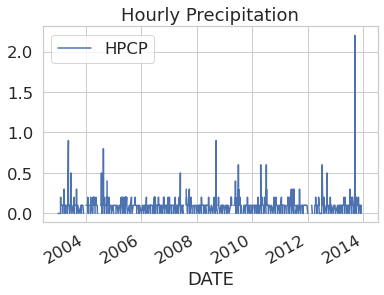

In [29]:
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation")
plt.show()

In [30]:
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [31]:
precip_2005_clean= precip_2005.dropna()

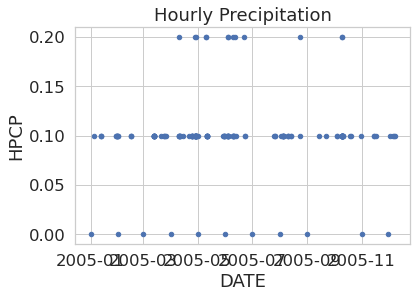

In [33]:
# Plot the data using pandas

precip_2005_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation",
                                     kind="scatter")
plt.show()

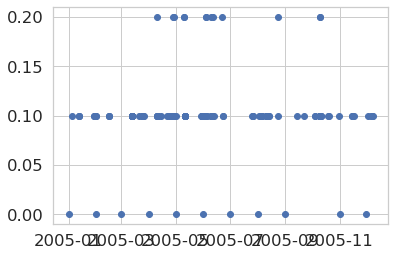

In [34]:
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
           y=precip_2005_clean["HPCP"])
plt.show()

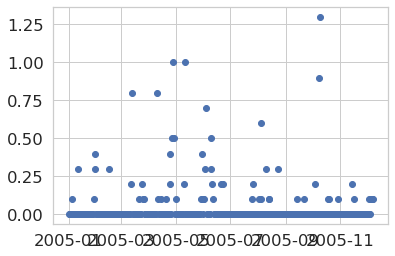

In [38]:
precip_2005_daily = precip_2005_clean.resample('D').sum()

f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
            y=precip_2005_daily['HPCP'])
plt.show()

In [55]:
precip_2012 = boulder_precip_2003_2013['2012'].dropna()
precip_2013 = boulder_precip_2003_2013['2013'].dropna()

precip_2012_hourly =  precip_2012.resample('H').sum()
precip_2013_hourly =  precip_2013.resample('H').sum()

precip_2012_daily =  precip_2012.resample('D').sum()
precip_2013_daily =  precip_2013.resample('D').sum()

precip_2013_daily.head()




,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2013-01-01,1650.5,40.0338,-105.2811,0.0
2013-01-02,0.0,0.0000,0.0000,0.0
2013-01-03,0.0,0.0000,0.0000,0.0
2013-01-04,0.0,0.0000,0.0000,0.0
2013-01-05,0.0,0.0000,0.0000,0.0


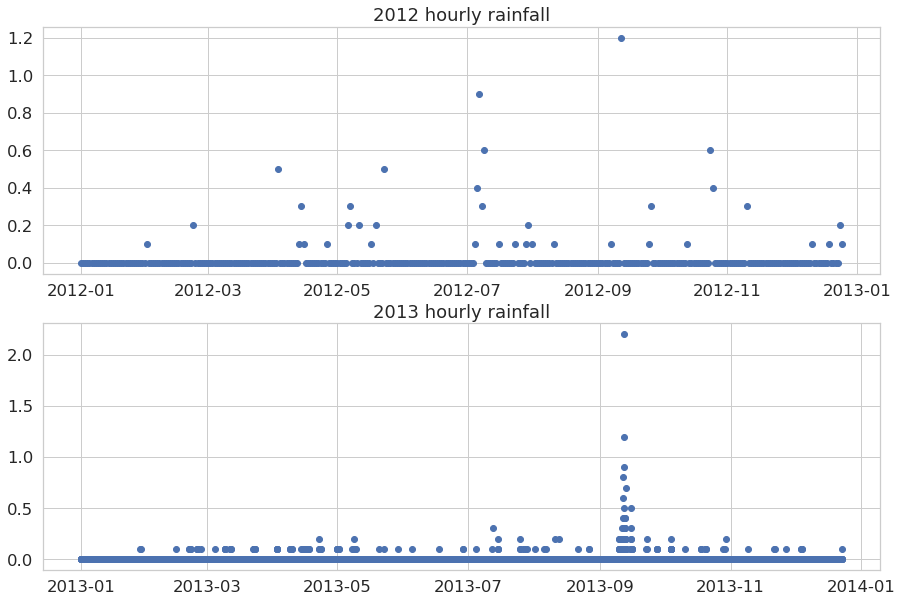

In [56]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
ax1.scatter(x=precip_2012_hourly.index.values,
            y=precip_2012_hourly['HPCP'])
ax1.set_title('2012 hourly rainfall')

ax2.scatter(x=precip_2013_hourly.index.values,
            y=precip_2013_hourly['HPCP'])
ax2.set_title('2013 hourly rainfall')      
plt.show()

In [47]:
print('max 2012', precip_2012_hourly['HPCP'].max())
print('max 2013',precip_2013_hourly['HPCP'].max())


max 2012 0.6
max 2013 2.2


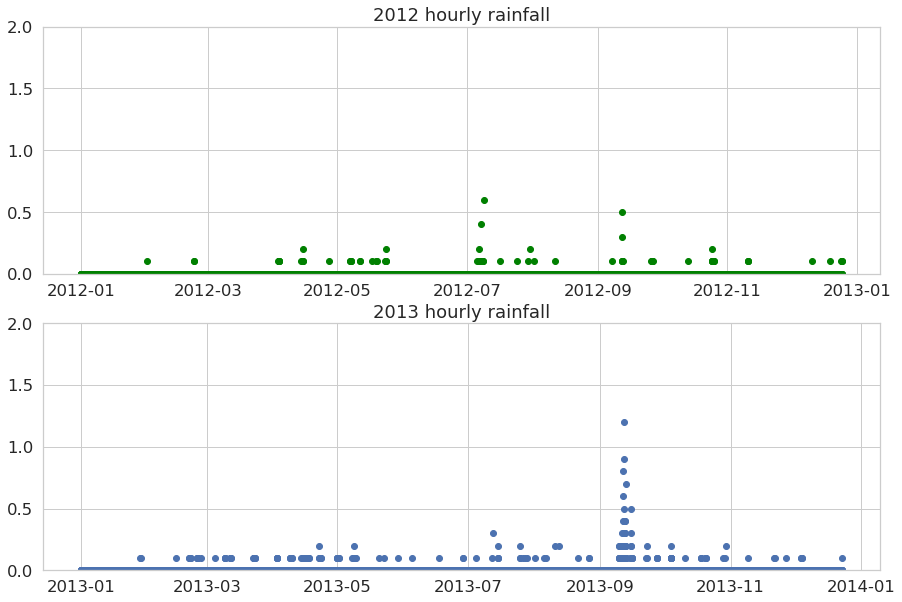

In [58]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
ax1.scatter(x=precip_2012_hourly.index.values,
            y=precip_2012_hourly['HPCP'],color ='green')
ax1.set_title('2012 hourly rainfall')
ax1.set(ylim=[0,2])

ax2.scatter(x=precip_2013_hourly.index.values,
            y=precip_2013_hourly['HPCP'])
ax2.set_title('2013 hourly rainfall')      
ax2.set(ylim=[0,2])
plt.show()

[(0.0, 2.0)]

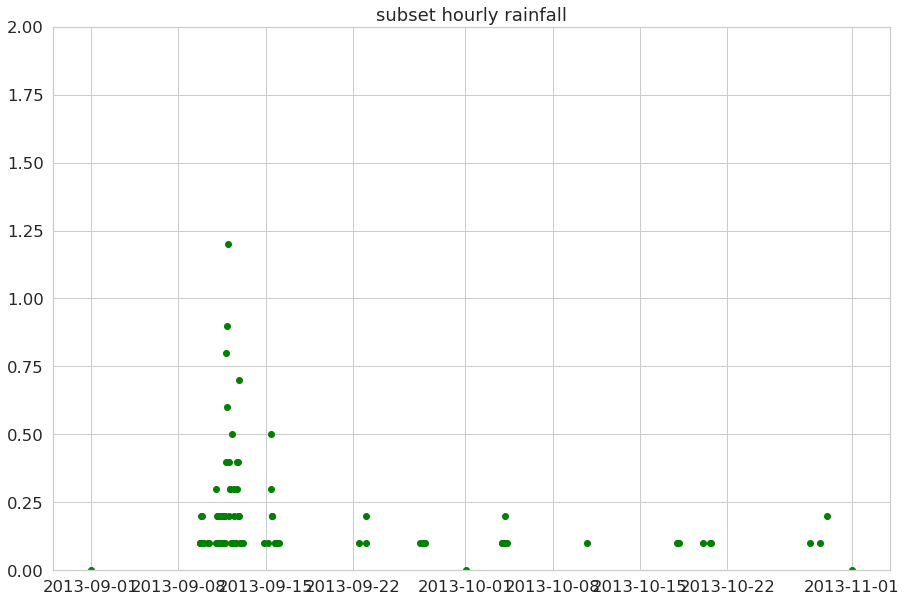

In [62]:
subset_rain = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots( figsize=(15,10))
ax.scatter(x=subset_rain.index.values,
            y=subset_rain['HPCP'],color ='green')
ax.set_title('subset hourly rainfall')
ax.set(ylim=[0,2])

In [ ]:
from matplotlib.dates import DateFormatter
f, ax = plt.subplots(figsize=(10,6))

ax.scatter(x= subset_rain.index.values,
            y=subset_rain['HPCP'])

date_form=DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.set(title='Optional Challenge \n Precipttaition Sept-Nov 2013')
plt.show()